<a href="https://colab.research.google.com/github/GiriSrinivasan/Bike_Sharing_CaseStudy_7/blob/main/Bike_Sharing_CaseStudy_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('C:/Data Science/Case Studies/Bike Sharing/day.csv',index_col=0)

In [ ]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [ ]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
df['season'] = df['season'].replace(1,'spring')

In [ ]:
df['season'] = df['season'].replace(2,'summer')

In [ ]:
df['season'] = df['season'].replace(3,'fall')

In [ ]:
df['season'] = df['season'].replace(4,'winter')

In [ ]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [ ]:
def object_map(x):
    return x.map ({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
df[['mnth']]=df[['mnth']].apply(object_map)

In [ ]:
df['mnth'].value_counts()

Aug      62
Jan      62
Dec      62
July     62
March    62
May      62
Oct      62
June     60
Sep      60
Nov      60
April    60
Feb      56
Name: mnth, dtype: int64

In [ ]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [ ]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [ ]:
def str_map(x):
    return x.map({1:'wed',2:'thu',3:'fri',4:'sat',5:'sun',6:'mon',0:'tues'})

In [ ]:
df[['weekday']]=df[['weekday']].apply(str_map)

In [ ]:
df['weekday'].value_counts()

wed     105
tues    105
mon     105
sun     104
thu     104
sat     104
fri     103
Name: weekday, dtype: int64

In [ ]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [ ]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
df.loc[(df['weathersit'] == 1), 'weathersit'] = "A"

In [ ]:
df.loc[(df['weathersit'] == 2), 'weathersit'] = "B"

In [ ]:
df.loc[(df['weathersit'] == 3), 'weathersit'] = "C"

In [ ]:
df.loc[(df['weathersit'] == 4), 'weathersit'] = "D"

In [ ]:
df['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [ ]:
import seaborn as sns 

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


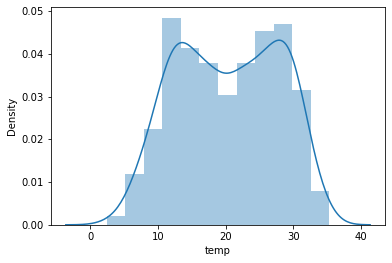

In [ ]:
_=sns.distplot(df['temp'])

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


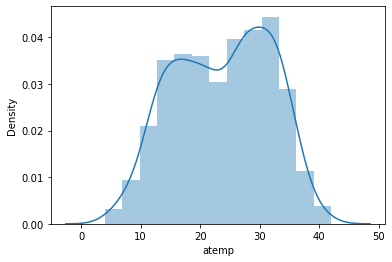

In [ ]:
_=sns.distplot(df['atemp'])

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


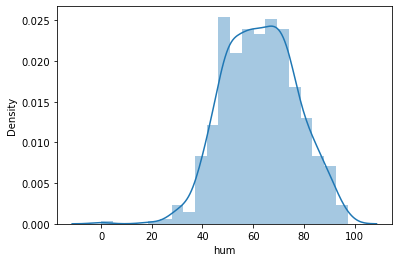

In [ ]:
_=sns.distplot(df['hum'])

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


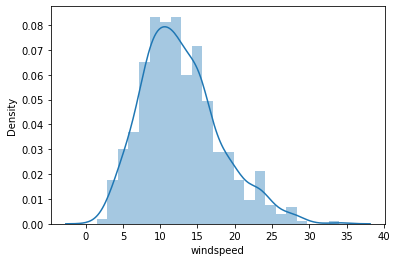

In [ ]:
_=sns.distplot(df['windspeed'])

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


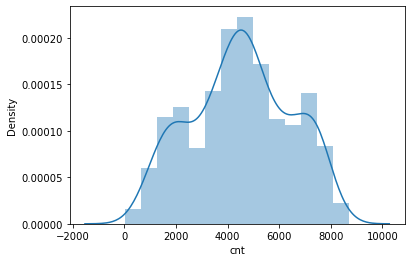

In [ ]:
_=sns.distplot(df['cnt'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [ ]:
df_categorical = df.select_dtypes('object')

In [ ]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [ ]:
df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,mon,B
2,spring,Jan,tues,B
3,spring,Jan,wed,A
4,spring,Jan,thu,A
5,spring,Jan,fri,A
...,...,...,...,...
726,spring,Dec,sat,B
727,spring,Dec,sun,B
728,spring,Dec,mon,B


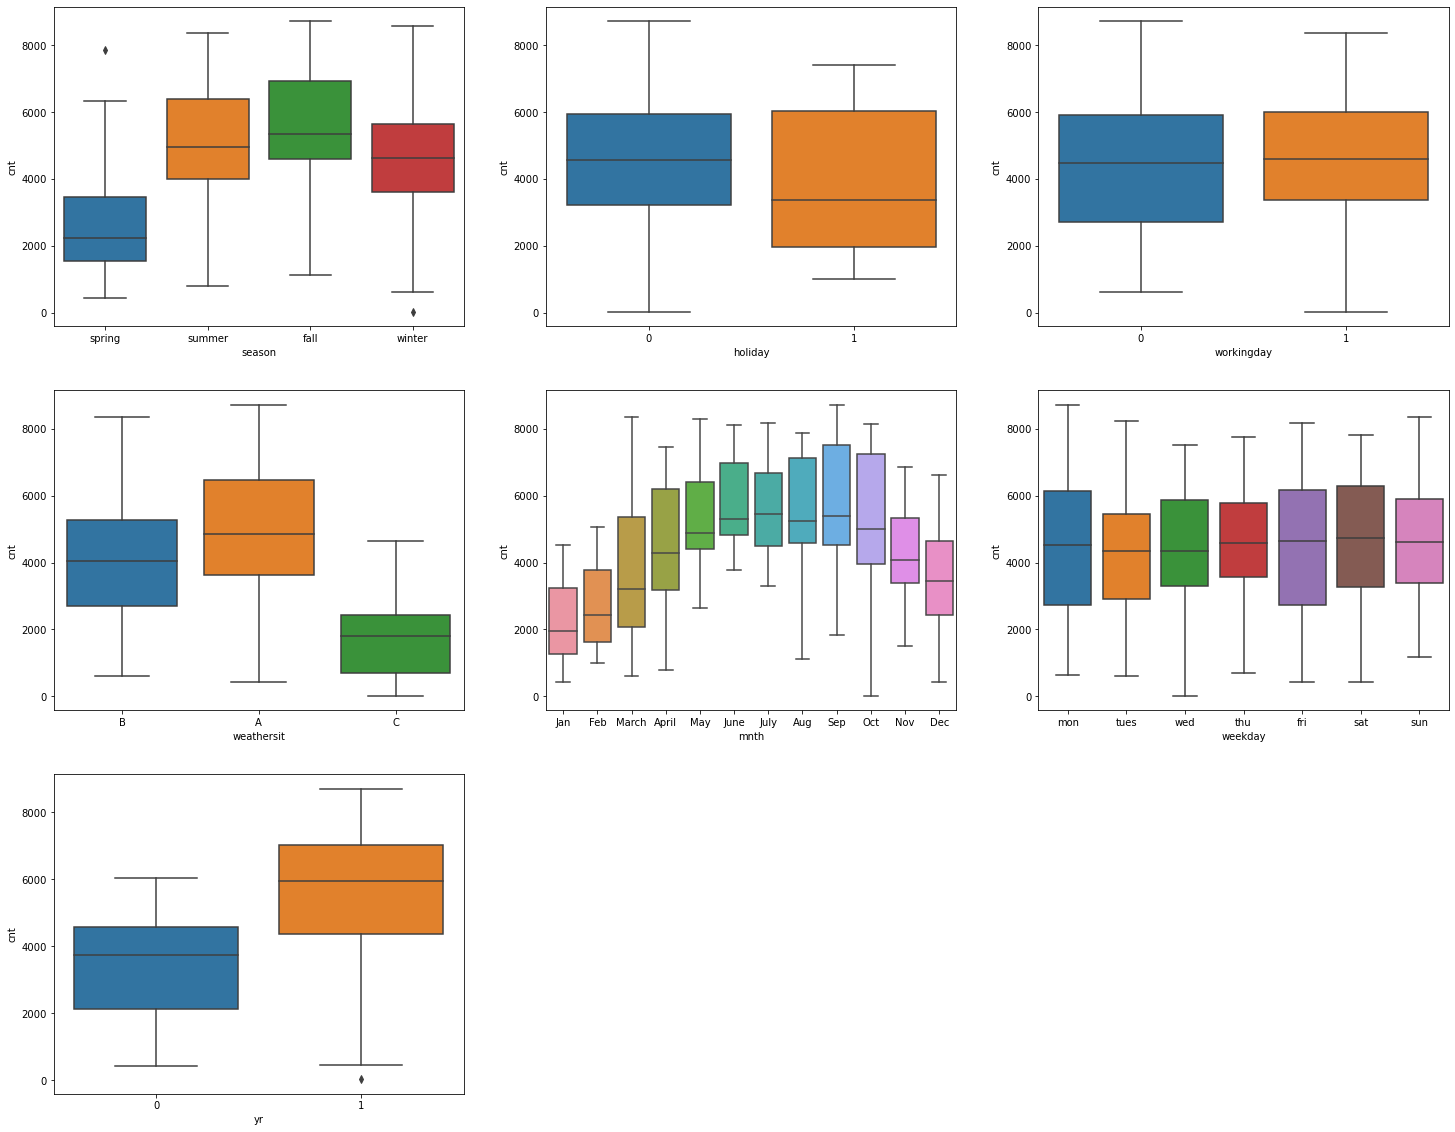

In [ ]:
plt.figure(figsize=(25,20))

plt.subplot(3,3,1)
sns.boxplot(x=df['season'],y=df['cnt'])

plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=df)

plt.show()


Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

In [ ]:
df_numeric=df.select_dtypes(include=['float64','int64'])

In [ ]:
df_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df_numeric=df_numeric.drop(['yr', 'holiday', 'workingday'],axis=1)

In [ ]:
import numpy as np

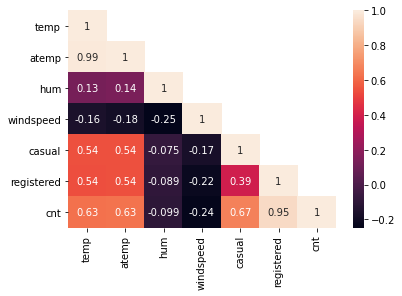

In [ ]:
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),mask=mask,annot=True)
plt.show()

In [ ]:
df.drop(['atemp'],axis=1,inplace=True)

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 65.6 KB


In [ ]:
df_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,mon,B
2,spring,Jan,tues,B
3,spring,Jan,wed,A
4,spring,Jan,thu,A
5,spring,Jan,fri,A
...,...,...,...,...
726,spring,Dec,sat,B
727,spring,Dec,sun,B
728,spring,Dec,mon,B


In [ ]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [ ]:
df_dummies

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 105.5+ KB


In [ ]:
df=df.drop(list(df_categorical.columns),axis=1)

In [ ]:
df=pd.concat([df,df_dummies],axis=1)

In [ ]:
df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [ ]:
df.drop(['dteday'],axis=1,inplace=True)

In [ ]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tues,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop('cnt',axis=1)
y = df['cnt']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x_train[['temp','hum','windspeed','casual','registered']] = scaler.fit_transform(x_train[['temp','hum','windspeed','casual','registered']])

<ipython-input-66-d65046c1448b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['temp','hum','windspeed','casual','registered']] = scaler.fit_transform(x_train[['temp','hum','windspeed','casual','registered']])
C:\Users\Giridharan.S\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
x_test[['temp','hum','windspeed','casual','registered']]=scaler.transform(x_test[['temp','hum','windspeed','casual','registered']] )

<ipython-input-67-a503800af895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['temp','hum','windspeed','casual','registered']]=scaler.transform(x_test[['temp','hum','windspeed','casual','registered']] )
C:\Users\Giridharan.S\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model=GradientBoostingRegressor()

In [ ]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
model.score(x_test,y_test)

0.9955939965105295

In [ ]:
model.score(x_train,y_train)

0.99902233796698